In [64]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
tickers = ['TSLA', 'GOOGL', 'GME', 'AMC', 'BB', 'BBBY', 'FIZZ']
benchmarks = ['SPY', 'IWM', 'DIA']

data = yf.download(tickers + benchmarks, period = '10y')['Adj Close']

[*********************100%***********************]  10 of 10 completed


In [12]:
#returning our tickers and return in percent change

data['my_port'] = data[tickers].mean(axis=1)
returns = data.pct_change()

asset_comp.T

,AMC,BB,BBBY,DIA,FIZZ,GME,GOOGL,IWM,SPY,TSLA,my_port
Date,,,,,,,,,,,
2012-07-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-07-23,NaN,0.011799,0.010101,-0.008826,-0.017409,-0.009816,0.007678,-0.015964,-0.010112,-0.035546,0.003210
2012-07-24,NaN,0.010204,-0.017258,-0.008273,0.002126,-0.025403,-0.012900,-0.013132,-0.008587,-0.026745,-0.015191
2012-07-25,NaN,-0.017316,-0.010011,0.005165,0.006365,0.002543,0.000691,0.002218,0.000224,-0.029826,-0.007845
2012-07-26,NaN,0.023495,0.022712,0.016363,0.005622,0.012682,0.008832,0.008591,0.016497,-0.028325,0.015489


In [15]:
asset_comp = pd.DataFrame(index = tickers)

In [16]:
asset_comp['weight'] = 1/ len(tickers)

In [22]:
asset_comp['ann_vol'] = (returns[:-63].var() / returns[:-63].std()) / np.sqrt(4)

In [26]:
beta = returns[-252:].cov() / returns[-252:].var()

In [27]:
for bench in benchmarks:
         asset_comp[bench + "Beta"] = beta[bench]

In [30]:
drawdown_5day_roll = returns.rolling(5).max() - returns.rolling(5).min()

asset_comp['avg_drawdown'] = drawdown_5day_roll.mean()
asset_comp['med_drawdown'] = drawdown_5day_roll.median()
asset_comp['max_drawdown'] = drawdown_5day_roll.max()

In [35]:
asset_comp['total_return']  = data.pct_change(len(data) - 1)[-1:].T
asset_comp['annualized_ret'] = asset_comp.total_return ** (1/np.sqrt(2520))

In [66]:
asset_comp.T

,TSLA,GOOGL,GME,AMC,BB,BBBY,FIZZ
weight,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
ann_vol,0.017627,0.008061,0.032953,0.043546,0.018643,0.019919,0.013239
SPYBeta,1.907500,1.293655,2.112711,2.167809,1.804195,1.781765,0.773593
IWMBeta,1.534558,0.845169,2.020515,2.141892,1.628155,1.902002,0.671203
DIABeta,1.856554,1.361746,2.111228,2.164421,1.917629,1.935935,0.861999
avg_drawdown,0.074631,0.034337,0.091159,0.098487,0.070706,0.068741,0.054363
med_drawdown,0.061824,0.028679,0.058800,0.059918,0.054331,0.044755,0.046714
max_drawdown,0.370707,0.208753,1.948358,3.578428,0.742973,0.899174,0.535827
total_return,114.852477,6.445479,12.623733,NaN,-0.119469,-0.901899,8.557994
annualized_ret,1.099104,1.037817,1.051807,NaN,NaN,NaN,1.043694


In [43]:
# table 2

port_comp = pd.DataFrame(index=benchmarks)

#correlation and covariance
port_comp['Correlation'] = returns[benchmarks+['my_port']].corr().my_port 
port_comp['Covariance'] = returns[benchmarks+['my_port']].cov().my_port * 10000 

In [44]:
# tracking error
for bench in benchmarks:
          port_comp.loc[bench, 'Error'] = (returns[bench] - returns.my_port).std() * 100 

In [45]:
# calculate excess return (port vs risk-free)
excess_return = (returns.my_port[-252:] - (0.02 / np.sqrt(252)))

In [48]:
# prepare dataframe for new data
port_comp["Sharpe"] = 0

In [55]:
# calculate Sharpe ratio for each benchmark
for bench in benchmarks:
    port_comp.loc[bench, 'Sharpe'] = (
        excess_return / (returns[-252:].my_port - returns[-252:][bench]).std())[-1]

In [61]:
port_comp["Volatility Spread"] = returns[benchmarks + ["my_port"]][-252:].std() ** (
        1 / 252
)

port_comp.T

,SPY,IWM,DIA
Correlation,0.558721,0.571323,0.487979
Covariance,1.341285,1.722120,1.182451
Error,1.887427,1.857361,1.975163
Sharpe,0.844256,0.897896,0.778273
Volatility Spread,0.982827,0.983736,0.982131


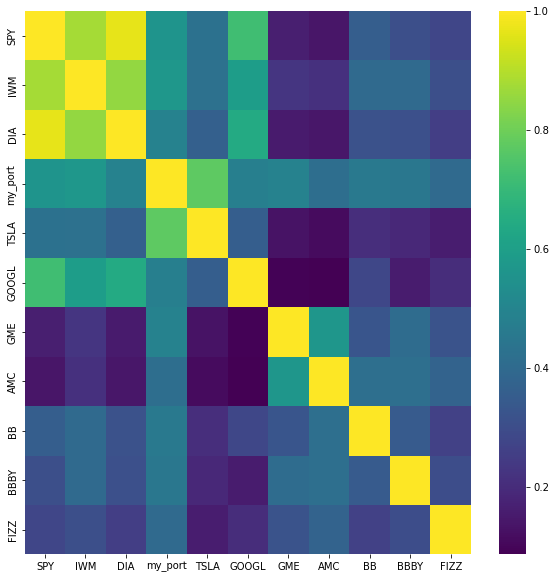

In [65]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(returns[benchmarks+['my_port']+tickers].corr(), cmap = 'viridis')

plt.show()

In [8]:
dataframe = [["SPY", 21.90, 75.342181, 1.9479738585612192, 1.568537104078637, 1.894856764892976],
        ["IWM", 71.45, 42.215428, 1.2845087143250462, 0.8300901053550491, 1.3461252578440046],
        ["DIA", 1.52, 38.539097, 0.7649746438098021, 0.6711877848368797, 0.8501990003706335]]

col_names = ["Ticker", "Correlation", "Covariance", "Tracking Errors 10Y", "Sharpe Ratio", "Annualized Volatility"]

print(tabulate(dataframe, headers=col_names, tablefmt="fancy_grid"))

╒══════════╤═══════════════╤══════════════╤═══════════════════════╤════════════════╤═════════════════════════╕
│ Ticker   │   Correlation │   Covariance │   Tracking Errors 10Y │   Sharpe Ratio │   Annualized Volatility │
╞══════════╪═══════════════╪══════════════╪═══════════════════════╪════════════════╪═════════════════════════╡
│ SPY      │         21.9  │      75.3422 │              1.94797  │       1.56854  │                1.89486  │
├──────────┼───────────────┼──────────────┼───────────────────────┼────────────────┼─────────────────────────┤
│ IWM      │         71.45 │      42.2154 │              1.28451  │       0.83009  │                1.34613  │
├──────────┼───────────────┼──────────────┼───────────────────────┼────────────────┼─────────────────────────┤
│ DIA      │          1.52 │      38.5391 │              0.764975 │       0.671188 │                0.850199 │
╘══════════╧═══════════════╧══════════════╧═══════════════════════╧════════════════╧═════════════════════════╛


In [ ]:
# code cited from the wonderf